In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123456)

import Corrfunc
from Corrfunc.theory.DDsmu import DDsmu
from Corrfunc.theory.DD import DD
from Corrfunc.theory.xi import xi
from Corrfunc.utils import compute_amps
from Corrfunc.utils import evaluate_xi
from Corrfunc.utils import qq_analytic
from Corrfunc.bases import spline

In [2]:
def rand_set(n):
    x = boxsize * np.random.rand(n)
    y = boxsize * np.random.rand(n)
    z = np.zeros(n)
    rand_set = np.array([x,y,z]).T
    return(rand_set)

### Set 1 ("DD")

In [3]:
boxsize = 20.0

set1 = []
set1 = rand_set(50)
set1

array([[ 2.53939666,  1.99473525,  0.        ],
       [19.33435677, 14.69192444,  0.        ],
       [ 5.20952012,  0.3308902 ,  0.        ],
       [17.94473049,  9.62769001,  0.        ],
       [ 7.53499432,  1.91877748,  0.        ],
       [ 6.72443489,  9.94612665,  0.        ],
       [ 9.02752941, 16.77592547,  0.        ],
       [16.80510167, 17.94666515,  0.        ],
       [ 2.46204289, 14.65183039,  0.        ],
       [10.86052404, 15.17448728,  0.        ],
       [ 7.4602445 , 11.21314366,  0.        ],
       [ 8.95993649,  9.42955855,  0.        ],
       [ 2.58881359,  2.77536236,  0.        ],
       [17.19757413,  1.88922267,  0.        ],
       [16.40776726, 18.84512677,  0.        ],
       [ 7.04107078,  2.68198479,  0.        ],
       [ 4.57774609, 12.61399105,  0.        ],
       [15.53567501, 12.79136435,  0.        ],
       [11.89567179,  8.66979571,  0.        ],
       [ 2.75107113,  3.11694121,  0.        ],
       [17.05799562, 17.25217966,  0.   

In [4]:
set1[:,0]

array([ 2.53939666, 19.33435677,  5.20952012, 17.94473049,  7.53499432,
        6.72443489,  9.02752941, 16.80510167,  2.46204289, 10.86052404,
        7.4602445 ,  8.95993649,  2.58881359, 17.19757413, 16.40776726,
        7.04107078,  4.57774609, 15.53567501, 11.89567179,  2.75107113,
       17.05799562,  4.71014957,  2.92454465, 11.79737546, 11.4802355 ,
        1.22539925, 11.80852007,  4.90699638,  6.80889875, 19.69457479,
       18.3908081 ,  0.75543375, 17.23098579, 15.07137691,  8.1035751 ,
        6.87051751,  3.41834344,  7.8931802 , 12.83332341,  5.49184861,
        9.24708669, 17.42743307,  8.02262444, 12.2117654 ,  2.35934259,
       14.04368722,  8.28067329,  6.84690426, 11.91850642,  3.99728526])

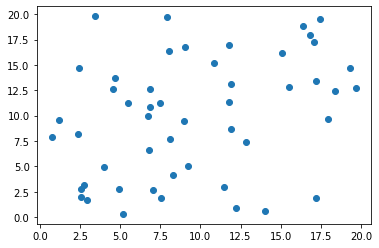

In [5]:
plt.scatter(set1[:,0],set1[:,1])

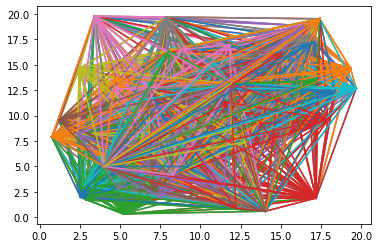

In [6]:
distances1=[]
k=0
for i in set1:
    for j in set1:
        d = np.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2)
        distances1.append(d)
        plt.plot([i[0],j[0]],[i[1],j[1]])
    k+=1

In [7]:
len(distances1)

2500

In [8]:
unique_dist1 = list(set(distances1))
print(len(unique_dist1))
unique_dist1

1226


[0.0,
 1.1419948709277206,
 1.4651784482926056,
 2.795697064336033,
 4.996175096422291,
 4.553831554097006,
 5.251431382483075,
 7.667779894991613,
 8.985497768692392,
 9.82343774731868,
 10.44958358170463,
 10.813115284966731,
 12.657331508932426,
 11.493316159813316,
 14.658557216599256,
 15.586757982455492,
 16.14247350754918,
 17.192623669052313,
 16.89587082265251,
 11.866430597470062,
 13.14187891569928,
 21.05443654670379,
 21.40033660197169,
 21.823551442132008,
 21.06132297466127,
 17.619245312219057,
 20.21154860118335,
 18.954636792693496,
 23.00228317086217,
 20.143244890529758,
 21.08964291495748,
 6.100601775399554,
 6.071263150096911,
 5.089465372235594,
 6.6611015154667825,
 5.823574302727934,
 7.675880477419781,
 7.374847221971919,
 7.835428578648219,
 7.206143754711519,
 7.595314123109148,
 8.25603642977228,
 8.783121211427584,
 8.214960801737561,
 8.172095947160102,
 8.584474115297297,
 9.723198241050113,
 9.57079248056263,
 9.575561933987927,
 9.862716155857612,
 9.

#### Binning distances

In [9]:
bins=15
bin_edges = np.linspace(0,boxsize,bins+1)
print(boxsize, bins+1)
bin_edges

20.0 16


array([ 0.        ,  1.33333333,  2.66666667,  4.        ,  5.33333333,
        6.66666667,  8.        ,  9.33333333, 10.66666667, 12.        ,
       13.33333333, 14.66666667, 16.        , 17.33333333, 18.66666667,
       20.        ])

In [10]:
DD1 = np.zeros(int(bins+1))

In [11]:
#for i in unique_dist1:
#    k = 0
#    while True:
#        if bin_edges[k] <= i < bin_edges[k+1]:
#            DD1[k] = DD1[k]+1
#            break
#        else:
#            k += 1
#DD1

array([ 15.,  53.,  60.,  96., 120., 108., 119.,  97., 118., 107.,  79.,
        67.,  64.,  57.,  31.])

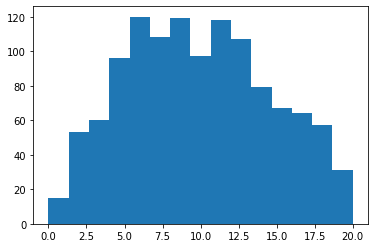

In [12]:
DD, bins1, _ = plt.hist(unique_dist1, bins=bin_edges)
DD

### Set 2 (RR)

In [13]:
set2 = []
set2 = rand_set(80)
set2

array([[19.86247966, 19.5951522 ,  0.        ],
       [ 0.61880058, 12.70047944,  0.        ],
       [ 7.13000205,  6.24068522,  0.        ],
       [ 4.94689902, 14.33187057,  0.        ],
       [ 3.75836242,  9.74816141,  0.        ],
       [ 2.26472377, 15.79731957,  0.        ],
       [13.79361127, 12.96033483,  0.        ],
       [17.7238314 ,  5.14288843,  0.        ],
       [ 5.58448978, 19.57522272,  0.        ],
       [13.81657243,  4.39849564,  0.        ],
       [12.12083625, 12.72203395,  0.        ],
       [ 1.21948467,  3.3894421 ,  0.        ],
       [ 3.37186709, 10.55321653,  0.        ],
       [18.26635961, 12.23066143,  0.        ],
       [15.31897736,  1.75700516,  0.        ],
       [ 4.33607809, 12.4521846 ,  0.        ],
       [18.72832415, 13.75407328,  0.        ],
       [13.81856446, 11.64628845,  0.        ],
       [18.64286072,  5.63289323,  0.        ],
       [ 5.55998212,  5.01691836,  0.        ],
       [ 0.45408601, 12.20041784,  0.   

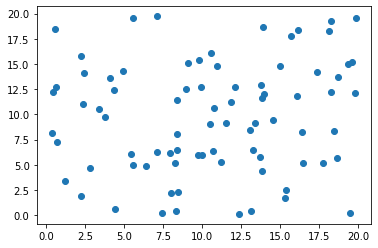

In [14]:
plt.scatter(set2[:,0],set2[:,1])

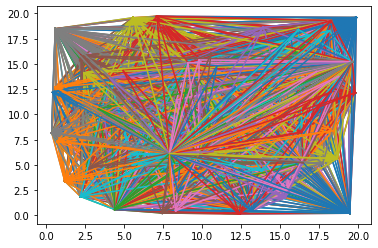

In [15]:
distances2=[]
for i in set2:
    for j in set2:
        d = np.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2)
        distances2.append(d)
        plt.plot([i[0],j[0]],[i[1],j[1]])

In [16]:
unique_dist2 = list(set(distances2))
print(len(unique_dist2))
unique_dist2

3161


[0.0,
 1.5238521755385186,
 1.5190721172957495,
 3.5846302405103394,
 4.192426717630983,
 5.206115130092744,
 6.803352600754351,
 7.535471016077828,
 8.991772079616375,
 8.653986122275093,
 6.61565242465889,
 6.230832279290382,
 12.994000954923521,
 7.851100633468377,
 14.015425287627359,
 15.816974405461096,
 16.355163248410918,
 17.090673824867043,
 18.45149788632508,
 18.876064728888192,
 20.44151894554066,
 18.002903793003416,
 18.80683129599684,
 18.407685971389842,
 24.701949349555008,
 20.42269173414988,
 20.76939672541107,
 22.996659646758914,
 22.353248521822003,
 22.75228365278261,
 25.00459593422511,
 24.495888753106385,
 23.81581426951395,
 5.618583831823116,
 6.289417769692022,
 6.794457672496151,
 7.236400514999559,
 6.231333935351017,
 8.560781849710565,
 8.401834694541776,
 9.881527118187137,
 3.716899867237587,
 10.350037247809382,
 10.646138207762647,
 10.331293967561464,
 11.27278926846941,
 11.951183856739817,
 11.538905772012072,
 11.213855736617688,
 12.4523694957

array([ 41., 111., 179., 235., 297., 321., 300., 341., 267., 257., 213.,
       197., 132., 111.,  78.])

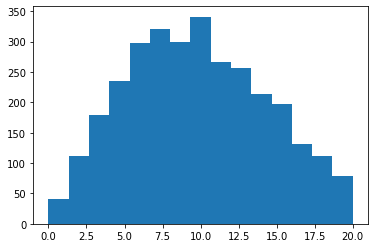

In [17]:
RR, bins2, _ = plt.hist(unique_dist2, bins=bin_edges)
RR

### Calculating correlation function: Peebles & Hauser

In [18]:
nd = len(set1)
nr = len(set2)
nd, nr

(50, 80)

In [19]:
DD_norm = DD/(nd*nd)
RR_norm = RR/(nr*nr)
DD_norm, RR_norm

(array([0.006 , 0.0212, 0.024 , 0.0384, 0.048 , 0.0432, 0.0476, 0.0388,
        0.0472, 0.0428, 0.0316, 0.0268, 0.0256, 0.0228, 0.0124]),
 array([0.00640625, 0.01734375, 0.02796875, 0.03671875, 0.04640625,
        0.05015625, 0.046875  , 0.05328125, 0.04171875, 0.04015625,
        0.03328125, 0.03078125, 0.020625  , 0.01734375, 0.0121875 ]))

In [20]:
xi = (DD_norm/RR_norm)-1

In [21]:
print(xi)
print(len(xi))

[-0.06341463  0.22234234 -0.14189944  0.04578723  0.03434343 -0.13869159
  0.01546667 -0.27178886  0.13138577  0.06583658 -0.05051643 -0.1293401
  0.24121212  0.31459459  0.0174359 ]
15


In [22]:
bins_avg=[]
for i in range(len(bin_edges)-1):
    avg = (bin_edges[i+1]+bin_edges[i])/2
    bins_avg.append(avg)
bins_avg

[0.6666666666666666,
 2.0,
 3.333333333333333,
 4.666666666666666,
 6.0,
 7.333333333333333,
 8.666666666666666,
 10.0,
 11.333333333333332,
 12.666666666666666,
 14.0,
 15.333333333333332,
 16.666666666666664,
 18.0,
 19.333333333333332]

Text(0, 0.5, '$\\xi$(r)')

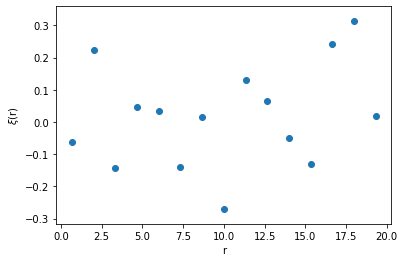

In [23]:
plt.scatter(bins_avg,xi)
plt.xlabel(r'r')
plt.ylabel(r'$\xi$(r)')

In [24]:
len(bin_edges)-1

15

## Comparing with Corrfunc value

### tophat basis

In [25]:
x, y, z = set1[0], set1[1], set1[2]
x_rand, y_rand, z_rand = set2[0], set2[1], set2[2]

In [26]:
rmin = 1.0
rmax = 8.0
nbins = len(bin_edges)-1
r_edges = np.linspace(rmin, rmax, nbins+1)
r_avg = 0.5*(r_edges[1:]+r_edges[:-1])
r_fine = np.linspace(rmin, rmax, 1000)

periodic = False
nthreads = 1
r_avg

array([1.23333333, 1.7       , 2.16666667, 2.63333333, 3.1       ,
       3.56666667, 4.03333333, 4.5       , 4.96666667, 5.43333333,
       5.9       , 6.36666667, 6.83333333, 7.3       , 7.76666667])

In [27]:
proj_type = 'tophat'
nprojbins = nbins

In [28]:
nmubins = 1
mumax = 1.0

In [29]:
dd_res, dd_proj, _ = DDsmu(1, nthreads, r_edges, mumax, nmubins, x, y, z,
                           boxsize=boxsize, periodic=periodic, proj_type=proj_type, nprojbins=nprojbins)

In [30]:
dr_res, dr_proj, _ = DDsmu(0, nthreads, r_edges, mumax, nmubins, x, y, z, X2=x_rand, Y2=y_rand, Z2=z_rand,
                           boxsize=boxsize, periodic=periodic, proj_type=proj_type, nprojbins=nprojbins)

In [31]:
rr_res, rr_proj, qq_proj = DDsmu(1, nthreads, r_edges, mumax, nmubins, x_rand, y_rand, z_rand,
                           boxsize=boxsize, periodic=periodic, proj_type=proj_type, nprojbins=nprojbins)

In [ ]:
# this causes the kernel to fail ?
#amps = compute_amps(nprojbins, nd, nd, nr, nr, dd_proj, dr_proj, dr_proj, rr_proj, qq_proj)

### cubic spline

In [1]:
proj_type = 'generalr'
kwargs = {'order': 3} # 3: cubic spline
projfn = 'quadratic_spline.dat'
nprojbins = int(nbins/2)
spline.write_bases(rmin, rmax, nprojbins, projfn, ncont=1000, **kwargs)

NameError: name 'nbins' is not defined

In [ ]:
dd_res_spline, dd_spline, _ = DDsmu(1, nthreads, r_edges, mumax, nmubins, x, y, z,
                           boxsize=boxsize, periodic=periodic, proj_type=proj_type, nprojbins=nprojbins, projfn=projfn)

In [ ]:
volume = boxsize**3
# nbins and r_edges won't be used here because we passed projfn, but they're needed for compatibility. (TODO: fix!)
rr_ana_spline, qq_ana_spline = qq_analytic(rmin, rmax, nd, volume, nprojbins, proj_type, rbins=r_edges, projfn=projfn)

In [ ]:
numerator = dd_spline - rr_ana_spline
amps_ana_spline = np.linalg.solve(qq_ana_spline, numerator) # Use linalg.solve instead of actually computing inverse!
print("numerator: ",numerator)
print("amps_ana_spline: ",amps_ana_spline)

In [ ]:
xi_ana_spline = evaluate_xi(amps_ana_spline, r_fine, proj_type, rbins=r_edges, projfn=projfn)

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(r_fine, xi_ana_spline, color='red', label='Cubic spline basis')
plt.xlabel(r'r')
plt.ylabel(r'$\xi$(r)')

In [ ]:
xi_ana_spline

In [ ]:
len(xi_ana_spline)